In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
data = pd.read_csv('Alphabets_data.csv')
print(data.head())

  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  


In [14]:
print(data.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [15]:
label_encoder = LabelEncoder()
data['letter'] = label_encoder.fit_transform(data['letter'])

In [16]:
X = data.drop(columns=['letter'])
y = data['letter']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

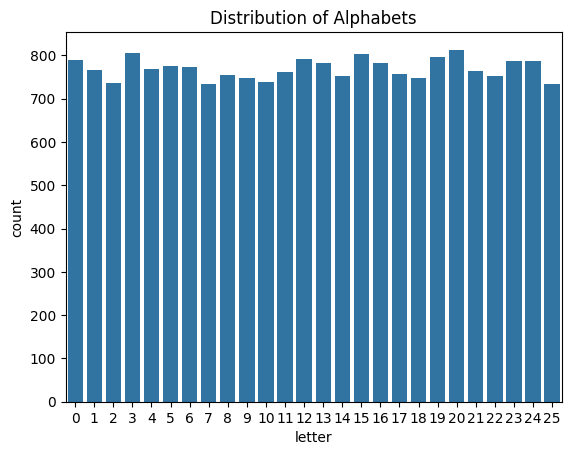

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of target variable
sns.countplot(x=y)
plt.title('Distribution of Alphabets')
plt.show()

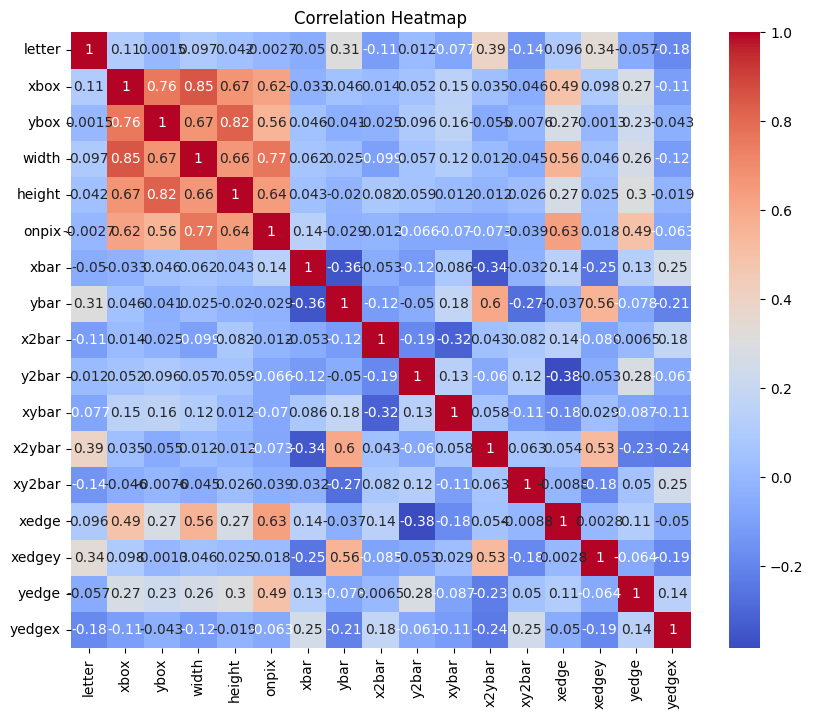

In [18]:
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
#pip install tensorflow keras-tuner

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2680 - loss: 2.6276 - val_accuracy: 0.6687 - val_loss: 1.2220
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7136 - loss: 1.0647 - val_accuracy: 0.7534 - val_loss: 0.8804
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7715 - loss: 0.7943 - val_accuracy: 0.7894 - val_loss: 0.7304
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8073 - loss: 0.6658 - val_accuracy: 0.8100 - val_loss: 0.6422
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8344 - loss: 0.5732 - val_accuracy: 0.8269 - val_loss: 0.5780
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8528 - loss: 0.4988 - val_accuracy: 0.8438 - val_loss: 0.5221
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8631 - loss: 0.4644 - val_accuracy: 0.8578 - val_loss: 0.4807
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8730 - loss: 0.4267 - val_accuracy: 0.

In [25]:

!pip install keras-tuner --upgrade
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.9 MB/s eta 0:00:00


<ipython-input-25-f69f181d5ccb>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [32]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='alphabet_tuning')

tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

Trial 4 Complete [00h 03m 20s]
val_accuracy: 0.8359375

Best val_accuracy So Far: 0.952916661898295
Total elapsed time: 00h 18m 56s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
48                |112               |units1
16                |48                |units2
0.01              |0.001             |learning_rate

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4816 - loss: 1.7499 - val_accuracy: 0.7709 - val_loss: 0.7467
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7976 - loss: 0.6624 - val_accuracy: 0.8300 - val_loss: 0.5477
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.5171 - val_accuracy: 0.8472 - val_loss: 0.5017
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8644 - loss: 0.4258 - val_accuracy: 0.8372 - val_loss: 0.5173
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8677 - loss: 0.4048 - val_accuracy: 0.8669 - val_loss: 0.4267
Epoch

KeyboardInterrupt: 

In [27]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}, Best units2: {best_hps.get('units2')}, Best learning_rate: {best_hps.get('learning_rate')}")

Best units1: 112, Best units2: 48, Best learning_rate: 0.001


In [28]:
# Build the best model with optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

In [31]:
# Train the model
best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9647 - loss: 0.1131 - val_accuracy: 0.9422 - val_loss: 0.1898
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9665 - loss: 0.1087 - val_accuracy: 0.9447 - val_loss: 0.1883
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9696 - loss: 0.1005 - val_accuracy: 0.9413 - val_loss: 0.1863
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9731 - loss: 0.0919 - val_accuracy: 0.9388 - val_loss: 0.1921
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0824 - val_accuracy: 0.9450 - val_loss: 0.1756
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0823 - val_accuracy: 0.9409 - val_loss: 0.1830
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0808 - val_accuracy: 0.9447 - val_loss: 0.1799
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0781 - val_accuracy: 0.

In [30]:
# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9400 - loss: 0.1842
Test Accuracy: 0.9415000081062317
